## **Easymoney Data Science Solutions**

The primary objective of this notebook is to assist the company Easymoney in achieving better profitability from the current customer portfolio. The notebook guides us through a typical workflow for solving data science problems.

We will follow a step-by-step workflow, explaning each step and rationale for every decision we take during solution development.


### **Workflow stages**

The problem solution workflow goes throught eigth diferent stages:

1. Question or problem definition
2. Explore the data, analyze and identify patterns
3. Wrangle, prepare, cleanse the data
4. Customers segmentation
5. Visualization and final solution
6. Purchase propensity model
7. Customer selection
8. Supply or submit the results

The workflow indicates general sequence of how each stage may follow the other. However there are use cases with exceptions.

* Perform a stage multiple times in our workflow. Visualize stage may be used multiple times.
* Drop a stage altogether. We may not need supply stage to productize since this is a simulation of a real project.



### **1. Question or problem definition**

Easymoney started as a company specializing in financial products with a user-friendly interface where customers could find solutions to their financial needs and easily contract them. After forming partnerships with a banking institution and carrying out two rounds of financing, Easymoney exceeded the target business figures set in the launch plan, achieving a turnover of several million euros.

However, after a period of time, it faces challenges that jeopardize its continuity. They are required to obtain profitability from the current customer base before continuing to invest. This is why the Marketing team dedicated to customer acquisition aims to use the solutions offered by Data Science to achieve better profitability from the current customer portfolio.


#### **Workflow goals**

**Explore the data.** Understanding the type of data we have, analyzing the characteristics of our sample, and attempting to find any patterns that do not provide useful information.

**Converting, correcting and creating.** To launch the models, we need to prepare the data. Depending on the model, we will need to convert all data to numerical equivalent values. We also need to handle missing data and create new features based on existing ones to ensure optimal model performance.

**Correlation and Variance.** We will study the correlation between features and the variance of each one.

**Segmentation.** We will look for customers with similar characteristics. We will understand these groups and visualize relevant components.

**Purchase Propensity Model.** We will launch a model that selects the top 10,000 customers with the highest propensity to purchase based on three product types: checking accounts, savings and investment products, and financing products.

**Customer Selection.** We will select our customers most likely to purchase products based on two criteria. The first maximizes profits in customer selection, and the second maximizes the number of product sign-ups. This way, the company can choose a strategy based on its current needs.


Libraries:

In [1]:
# Data analysis and wrangling
import numpy as np
import pandas as pd
import datetime
import time
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OrdinalEncoder,StandardScaler
from sklearn.feature_selection import VarianceThreshold

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning

# Best practices
pd.set_option("display.max_rows", 200)  
pd.options.display.float_format = '{:.2f}'.format

Acquire data:

In [2]:
df = pd.read_csv('data_easymoney.csv')

### **2. Explore the data, analyze and identify patterns**

We are going to analyze the dataset by answering the following questions.

#### **Which features ara available in the dataset?**

Let's see what the attributes of the dataset are and what they mean. This will help us better understand them when we analyze them. (The 'Unnamed: 0' column is irrelevant and will be removed in the data wrangling part).

In [3]:
print(df.columns.values)

['Unnamed: 0' 'pk_cid' 'pk_partition' 'short_term_deposit' 'loans'
 'mortgage' 'funds' 'securities' 'long_term_deposit' 'em_account_pp'
 'credit_card' 'payroll' 'pension_plan' 'payroll_account' 'emc_account'
 'debit_card' 'em_account_p' 'em_acount' 'entry_date' 'entry_channel'
 'active_customer' 'segment' 'country_id' 'region_code' 'gender' 'age'
 'deceased' 'salary']


**Primary keys:**
* pk_cid: customer identifier
* pk_partition: data entry date

We can group the products into three categories: accounts, savings and investment, and financing.

**Accounts products:**
* em_account_pp: easymoney account++
* payroll: domiciliations
* payroll_account: account with benefits for direct debits
* emc_account: easymoney Crypto account
* debit_card: debit card
* em_account_p: easymoney account+
* em_account: easymoney account

**Saving and investment products:**
* short_term_deposit: short term deposit
* funds: investment funds
* securities: securities
* long_term_deposit: long term deposit
* pension_plan: pension plan

**Financing products:**
* loans: loans
* mortgage: mortgage
* credit_card: credit card

**Sociodemographic:**
* age: customer's age
* country_id: customer's country of residence
* deceased: deceased index. N/S
* gender: gender
* region_code: province of residence
* salary: gross familiy income

**Activity:**
* active_customer: customer activity indicator in our application
* entry_channel: customer acquisition channel
* entry_date: date of the first contract through Easymoney
* segment: customer's business segment

In [4]:
print(df.dtypes)

Unnamed: 0              int64
pk_cid                  int64
pk_partition           object
short_term_deposit      int64
loans                   int64
mortgage                int64
funds                   int64
securities              int64
long_term_deposit       int64
em_account_pp           int64
credit_card             int64
payroll               float64
pension_plan          float64
payroll_account         int64
emc_account             int64
debit_card              int64
em_account_p            int64
em_acount               int64
entry_date             object
entry_channel          object
active_customer       float64
segment                object
country_id             object
region_code           float64
gender                 object
age                     int64
deceased               object
salary                float64
dtype: object


#### **Which features are categorical?**

Understanding the different categorical features we have will give us a better insight when visualizing the data.

* Object to convert into datetime: pk_partiton, entry_date
* Categorical binaries: deceased
* Categorical: entry_channel, country_id, gender (We have 'male' and 'female,' and we will convert the null values to 'undefined,' so it cannot be a binary classification)
* Ordinal: segment



#### **Which features are numerical?**

Understaning what type of numerical features we have will help with data visualization.

We notice that all the 'product' fields (accounts, savings, etc.) inform us if a specific customer (pk-cid) on a given date (pk_partition) has the product contracted. Therefore, the values of these products should be 1's or 0's. In case the value is not int64, we will transform it from float to int64, gaining space savings and improved efficiency.

Additionally, we can separate the numerical features into binary and non-binary ones.

BINARY:
* Float to convert into Int64: payroll, pension_plan, active_customer
* Int64: all the others products (check above)

NON BINARY:
* Continous: pk_cid, region_code
* Discrete: salary

In [5]:
# preview the data
df.head()

,Unnamed: 0,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
0,0,1375586,2018-01-28,0,0,0,0,0,0,0,...,2018-01-12,KHL,1.00,02 - PARTICULARES,ES,29.00,H,35,N,87218.10
1,1,1050611,2018-01-28,0,0,0,0,0,0,0,...,2015-08-10,KHE,0.00,03 - UNIVERSITARIO,ES,13.00,V,23,N,35548.74
2,2,1050612,2018-01-28,0,0,0,0,0,0,0,...,2015-08-10,KHE,0.00,03 - UNIVERSITARIO,ES,13.00,V,23,N,122179.11
3,3,1050613,2018-01-28,1,0,0,0,0,0,0,...,2015-08-10,KHD,0.00,03 - UNIVERSITARIO,ES,50.00,H,22,N,119775.54
4,4,1050614,2018-01-28,0,0,0,0,0,0,0,...,2015-08-10,KHE,1.00,03 - UNIVERSITARIO,ES,50.00,V,23,N,NaN


#### **Which features cointain null values?**

These will require correcting:
* salary > segment > entry_channel > region_code > payroll = pension_plan > gender features contain a number of null values in that order for the dataset


In [6]:
# number of nulls
for i in df.columns.values:
    if df[i].isna().sum()>0:
        print(f"Total sum of nulls of {i} --->",df[i].isna().sum())

Total sum of nulls of payroll ---> 61
Total sum of nulls of pension_plan ---> 61
Total sum of nulls of entry_channel ---> 133033
Total sum of nulls of segment ---> 133944
Total sum of nulls of region_code ---> 2264
Total sum of nulls of gender ---> 25
Total sum of nulls of salary ---> 1512103


#### **Which features may contain errors or typos?**

This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting. Also, by grouping the data we can see what errors ther are.

* Name of feature em_acount is incorrect --> should be em_account
* We have some incongruent data, since we have some clients who are dead and who are active clients.

In [7]:
len(df[(df['deceased']=='S') & (df['active_customer']==1)])

718

#### **What is the distibution of numerical feature values across the samples?**

* Total number of entries is 5,962,924, but the number of customers is 456,373. This is because, in some cases, for each tuple (pk_cid, pk_partition), we have one record.
* Product's features (check above which ones are) has 0 or 1 values. Also active_customer
* em_account_pp has all values 0's --> this column is irrelevant
* Most contracted product = em_acount  73% of the total months is contracted in the customers accounts
* Less contracted product = em_acount_p  0.001% of the total months is contracted in the customers accounts
* Young customers, (<75%) has less than 34 years
* Average salary is 88ks per family

In [8]:
df.describe()

,Unnamed: 0,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,...,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,active_customer,region_code,age,salary
count,5962924.00,5962924.00,5962924.00,5962924.00,5962924.00,5962924.00,5962924.00,5962924.00,5962924.00,5962924.00,...,5962863.00,5962924.00,5962924.00,5962924.00,5962924.00,5962924.00,5962924.00,5960660.00,5962924.00,4450821.00
mean,2981461.50,1234929.80,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.01,...,0.04,0.06,0.05,0.09,0.00,0.73,0.40,25.81,29.76,115816.72
std,1721348.03,162302.04,0.05,0.01,0.01,0.06,0.06,0.13,0.00,0.11,...,0.19,0.23,0.23,0.29,0.00,0.44,0.49,13.60,11.98,199551.89
min,0.00,15891.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,1202.73
25%,1490730.75,1112532.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,13.00,22.00,61500.63
50%,2981461.50,1231097.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,28.00,25.00,88654.65
75%,4472192.25,1352339.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,1.00,36.00,34.00,131669.91
max,5962923.00,1553689.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,52.00,105.00,28894395.51


#### **What is the distribution of categorical features**

* 17 months (pk_partition) of records
* Several difference entry_date 
* Segment variable as three posible values with 66% university students   (freq=3900166/count=5828980)
* 41 different countries (unique=41)
* Gender features are well balanced 51% male (freq=3087502/count=5962899) vs 49% female 


In [9]:
df.describe(include=['O'])

,pk_partition,entry_date,entry_channel,segment,country_id,gender,deceased
count,5962924,5962924,5829891,5828980,5962924,5962899,5962924
unique,17,1499,68,3,41,2,2
top,2019-05-28,2017-07-28,KHE,03 - UNIVERSITARIO,ES,H,N
freq,442995,57389,3113947,3900166,5960672,3087502,5961849


#### **Analyze by grouping features**

We can extract some information by analyzing our feature correlations by pivoting features against each other.

**Countries:** 
* The country Spain (ES) has 99% (5960672/len(df)) of all the records in our database.

In [10]:
df_countries = df.groupby('country_id')['pk_cid'].count().sort_values(ascending=False).reset_index()
df_countries.columns = ['country', 'total_customers']
df_countries.head(10)

,country,total_customers
0,ES,5960672
1,GB,441
2,FR,225
3,DE,199
4,US,195
5,CH,194
6,BR,87
7,BE,81
8,VE,79
9,IE,68


**Age, salary and active_customer per gender:** We separate our sample into females and males and analyze some features based on that. In the case of salary, as we have many null values, we use the np.nanmean function to ignore the nulls in the calculation of the mean.
* H = female (Hembra in spanish)
* V = male (Varon in spanish)
* The average age for males is over 2 years higher than for females.
* The average salary for males is over 3k higher than for females. 
* The males are more active customers the females.

In [11]:
df[['gender','active_customer','age','salary']].groupby(['gender'], as_index=False).mean()

,gender,active_customer,age,salary
0,H,0.38,28.76,114548.05
1,V,0.43,30.84,117169.98


#### **Analyze by visualizing data**

Until now, we have analyzed the information in a very static way. Now, using graphs, we are going to understand how the products and customers evolve based on several facts. We will have the following categories when analyzing our data:
* **I) Evolution of products and customers:** total products evolution, evolution of clients by segment and evolution of customer registration and cancellations in each product.
* **II) Customers analysis:** customer entry date, entry channel,...

First of all, we have to create a df composed only of the Easymoney products.

In [12]:
# products dataframe
df_products = df.iloc[:,1:18]

# products list
products_names = df_products.columns

**I) Evolution of products and customers**

- **Total products evolution:** the idea is to see how the number of products evolve over time. \

In [13]:
# We create a function to get the total number of hiring for each product by date
def TotalSales(df, column_name):
    sales = df_products.groupby('pk_partition').agg( **{f"{column_name}_sum":(column_name,'sum')})
    
    return sales

In [14]:
df_short_term_deposit = TotalSales(df_products, 'short_term_deposit')
df_loans = TotalSales(df_products, 'loans')
df_mortgage = TotalSales(df_products, 'mortgage')
df_funds = TotalSales(df_products, 'funds')
df_securities = TotalSales(df_products, 'securities')
df_long_term_deposit = TotalSales(df_products, 'long_term_deposit')
df_em_account_pp = TotalSales(df_products, 'em_account_pp')
df_credit_card = TotalSales(df_products, 'credit_card')
df_payroll = TotalSales(df_products, 'payroll')
df_pension_plan = TotalSales(df_products, 'pension_plan')
df_payroll_account = TotalSales(df_products, 'payroll_account')
df_emc_account = TotalSales(df_products, 'emc_account')
df_debit_card = TotalSales(df_products, 'debit_card')
df_em_account_p = TotalSales(df_products, 'em_account_p')
df_em_acount = TotalSales(df_products, 'em_acount')

In [15]:
total_sales_df = pd.concat([df_short_term_deposit,df_loans,df_mortgage,df_funds,df_securities,df_long_term_deposit,
                            df_em_account_pp,df_credit_card,df_payroll, df_pension_plan, df_payroll_account,
                            df_emc_account, df_debit_card, df_em_account_p, df_em_acount], axis=1)

In [16]:
# dataframe of the total products contracted per month
total_sales_df.head()

,short_term_deposit_sum,loans_sum,mortgage_sum,funds_sum,securities_sum,long_term_deposit_sum,em_account_pp_sum,credit_card_sum,payroll_sum,pension_plan_sum,payroll_account_sum,emc_account_sum,debit_card_sum,em_account_p_sum,em_acount_sum
pk_partition,,,,,,,,,,,,,,,
2018-01-28,883,19,15,786,932,4884,0,3325,8145.00,8835.00,13478,15320,24696,2,215293
2018-02-28,1343,19,15,872,965,4956,0,3282,8889.00,9496.00,14246,15827,25448,2,217098
2018-03-28,1664,23,17,969,965,4965,0,3511,9735.00,9882.00,14989,16428,27046,2,218683
2018-04-28,1740,24,17,1084,983,5107,0,3725,9905.00,10560.00,15825,16947,27764,2,219816
2018-05-28,1455,27,18,1145,1012,5356,0,3797,9994.00,10148.00,16697,17569,27911,2,221291


In [17]:
# we create a variable with the sum of sales per month
total_sales_df['total_sales_month'] = total_sales_df.sum(axis=1)

We visualize the total evolution of the products for each month:

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total products')]

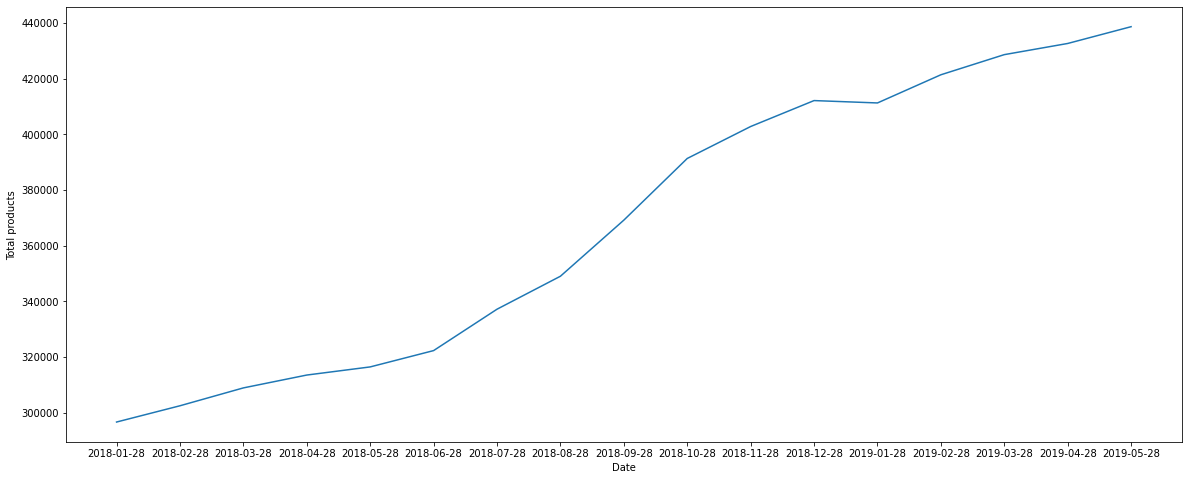

In [18]:
plt.figure(figsize=(20,8))
graph=sns.lineplot(data=total_sales_df["total_sales_month"])
graph.set(xlabel='Date', ylabel='Total products')

- **Evolution of clients by segment**

In [19]:
customer_by_segment = df.groupby('pk_partition')['segment'].value_counts(dropna=False).rename('total_by_segment').reset_index()
customer_by_segment.set_index("pk_partition", inplace=True)
customer_by_segment.head(8)

,segment,total_by_segment
pk_partition,,
2018-01-28,03 - UNIVERSITARIO,169792
2018-01-28,02 - PARTICULARES,65722
2018-01-28,01 - TOP,3951
2018-01-28,NaN,28
2018-02-28,03 - UNIVERSITARIO,170064
2018-02-28,02 - PARTICULARES,68211
2018-02-28,01 - TOP,4220
2018-02-28,NaN,26


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Customers per segment')]

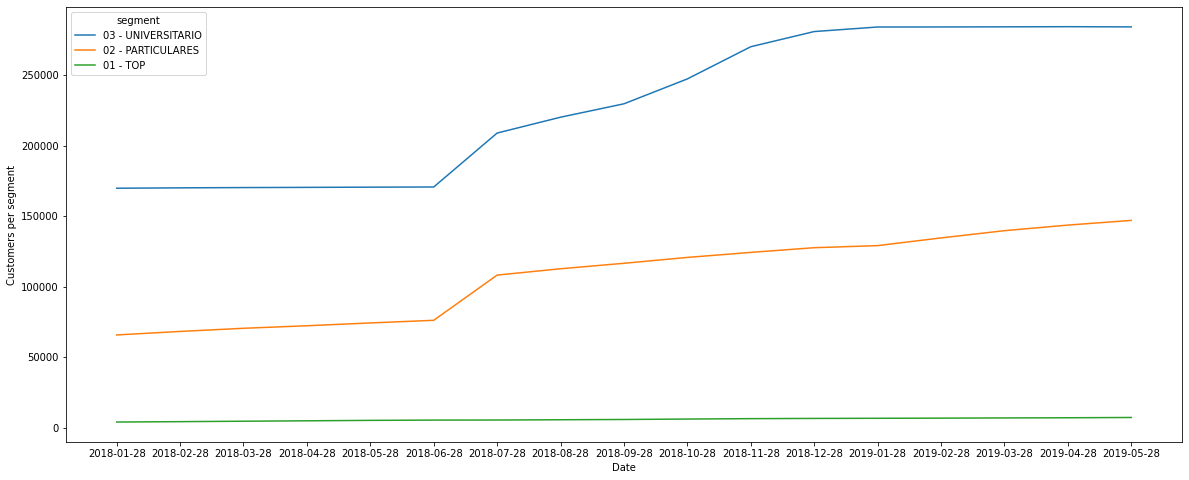

In [20]:
plt.figure(figsize=(20,8))
graph = sns.lineplot(data = customer_by_segment, x = customer_by_segment.index, y = 'total_by_segment', hue = 'segment')
graph.set(xlabel = 'Date', ylabel='Customers per segment')

* **Evolution of customer registration and cancellations in each product:** The idea is to see the cancellations and registrations of each product over time. 

In [21]:
# function that shows us how many registrations and cancellations we have over time

def RegistrationsCancellations(df, column_name):
    previous_month = column_name + "_previous_month"
    difference = column_name + "_dif"
    
    # calculation of the contracted product for the previus month and the difference between both months.
    df[previous_month] = df.groupby('pk_cid')[column_name].shift(1)
    df[difference] = df[column_name] - df[previous_month]
    
    # calculation of total cancellations and registrations
    cancellations = df[df[difference] == -1].pivot_table(index='pk_partition', values=difference, aggfunc=[len])
    registrations = df[df[difference] == 1].pivot_table(index='pk_partition', values=difference, aggfunc=[len])
    products=pd.merge(cancellations, registrations, on="pk_partition")
    products.columns=["Registrations", "Cancellations"]

    plt.figure(figsize=(20,8))
    graph=sns.lineplot(data=products)
    graph.set(xlabel='Date', ylabel='Customers')
    plt.title(column_name)

    return 

We show some of the graphs for each chosen variable. We can display any variable we want by applying the RegistrationsCancellations function to the column we want

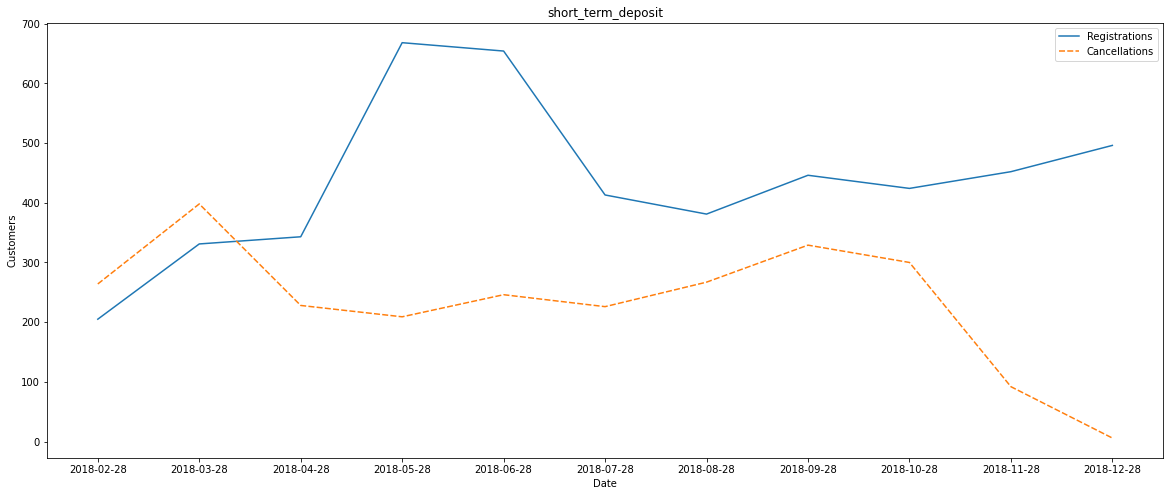

In [22]:
RegistrationsCancellations(df_products,'short_term_deposit')

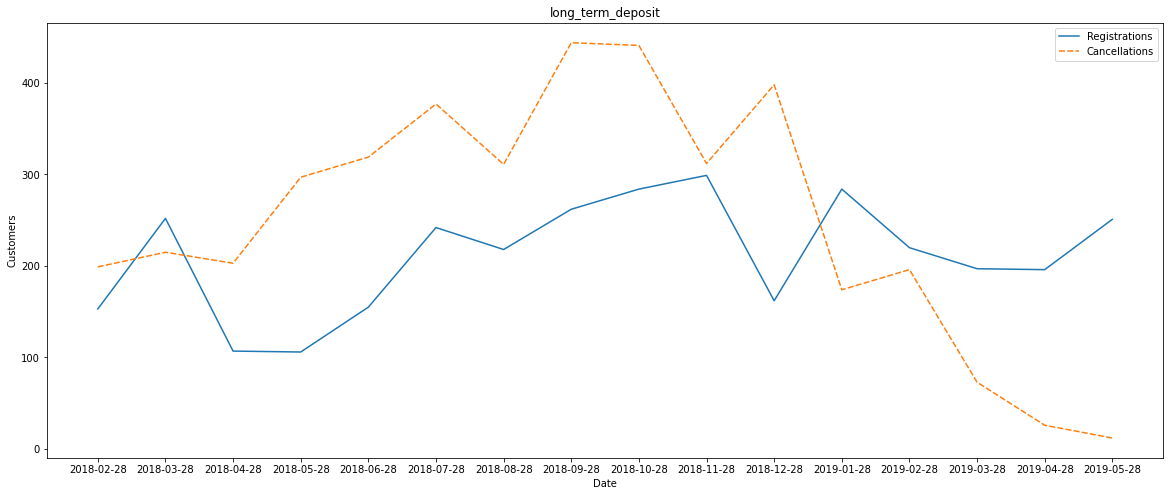

In [23]:
RegistrationsCancellations(df_products,'long_term_deposit')

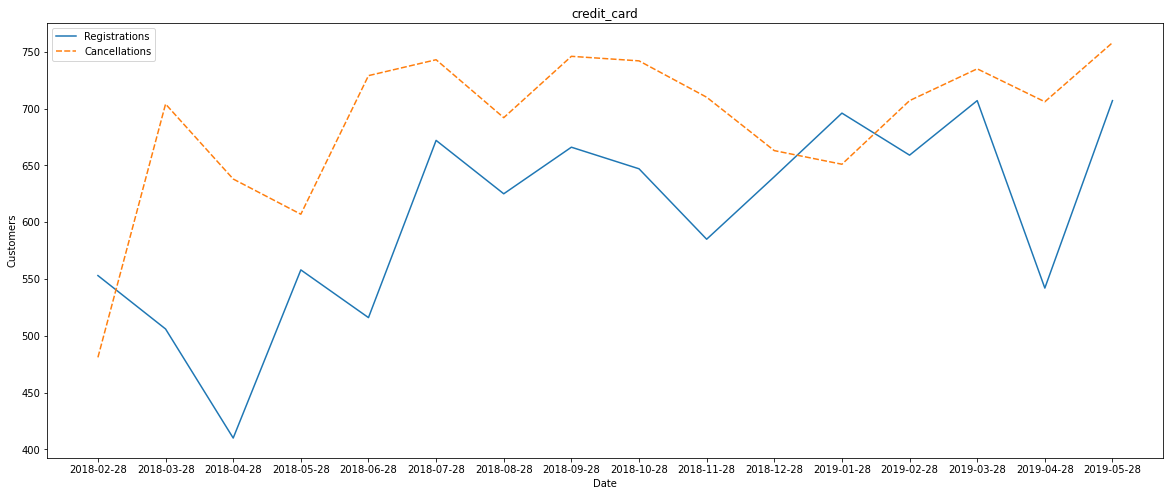

In [24]:
RegistrationsCancellations(df_products,'credit_card')

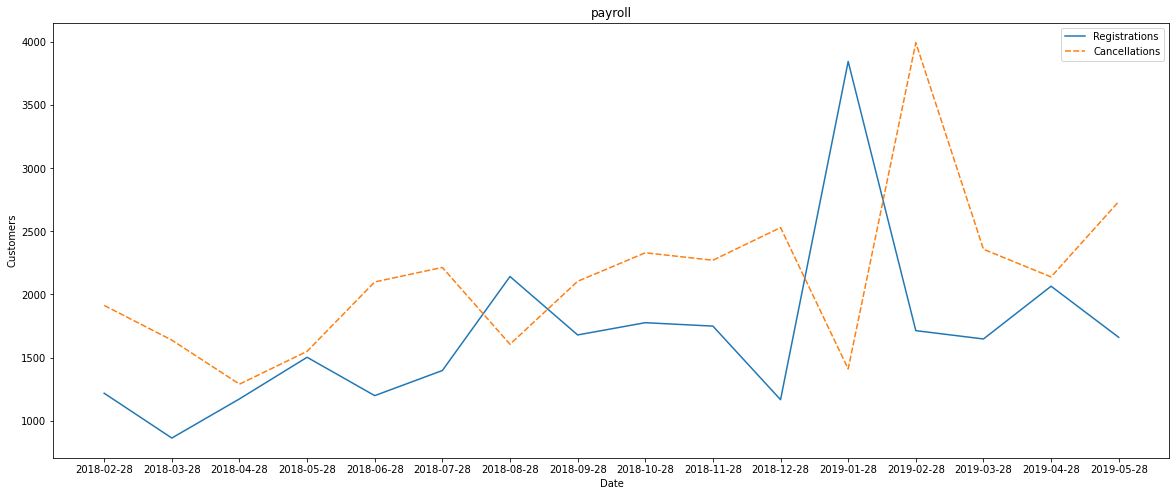

In [25]:
RegistrationsCancellations(df_products,'payroll')

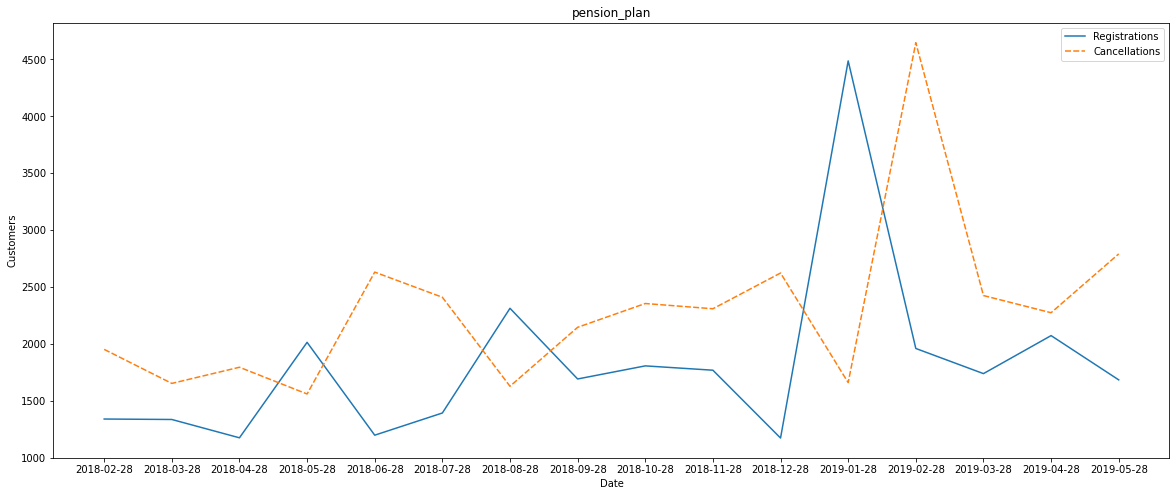

In [26]:
RegistrationsCancellations(df_products,'pension_plan')

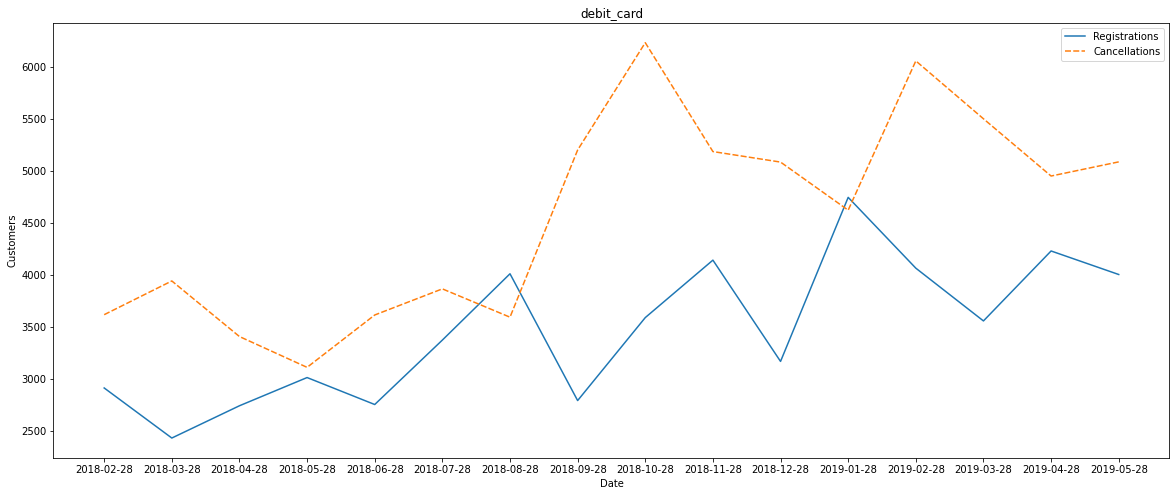

In [27]:
RegistrationsCancellations(df_products,'debit_card')

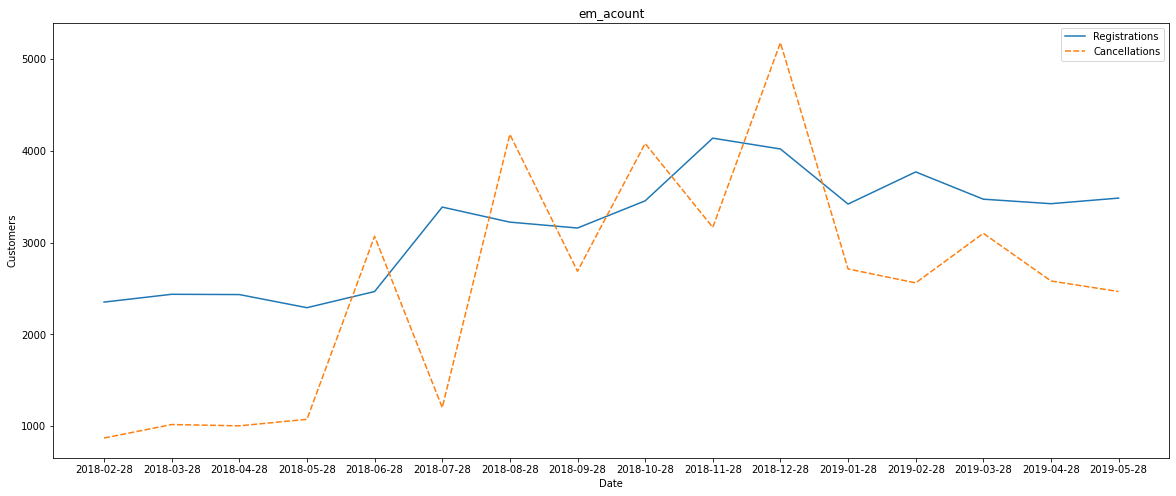

In [28]:
RegistrationsCancellations(df_products,'em_acount')

* **Evolution of customer registration and cancellations TOTAL:**
Now, instead of looking at the results product by product, we will analyze the products as a whole.

In [29]:
# function that shows us how many registrations and cancellations we have over time. Similar to the previous functions but without graphing.

def RegistrationsCancellations2(df, column_name):
    previous_month = column_name + "_previous_month"
    difference = column_name + "_dif"
    
    # calculation of the contracted product for the previus month and the difference between both months.
    df[previous_month] = df.groupby('pk_cid')[column_name].shift(1)
    df[difference] = df[column_name] - df[previous_month]
    
    # calculation of total cancellations and registrations
    cancellations = df[df[difference] == -1].pivot_table(index='pk_partition', values=difference, aggfunc=[len])
    registrations = df[df[difference] == 1].pivot_table(index='pk_partition', values=difference, aggfunc=[len])
    products=pd.merge(cancellations, registrations, on="pk_partition")
    products.columns=["Registrations", "Cancellations"]


    return products

In [30]:
# we calculate the registrations and cancellationss for each product and put it together in a single dataframe

dif_short_term_deposit = RegistrationsCancellations2(df_products, 'short_term_deposit')
dif_loans = RegistrationsCancellations2(df_products, 'loans')
dif_mortgage = RegistrationsCancellations2(df_products, 'mortgage')
dif_funds = RegistrationsCancellations2(df_products, 'funds')
dif_securities = RegistrationsCancellations2(df_products, 'securities')
dif_long_term_deposit = RegistrationsCancellations2(df_products, 'long_term_deposit')
dif_credit_card = RegistrationsCancellations2(df_products, 'credit_card')
dif_payroll = RegistrationsCancellations2(df_products, 'payroll')
dif_pension_plan = RegistrationsCancellations2(df_products, 'pension_plan')
dif_payroll_account = RegistrationsCancellations2(df_products, 'payroll_account')
dif_emc_account = RegistrationsCancellations2(df_products, 'emc_account')
dif_debit_card = RegistrationsCancellations2(df_products, 'debit_card')
dif_em_acount = RegistrationsCancellations2(df_products, 'em_acount')

total_dif = pd.concat([dif_short_term_deposit, dif_loans, dif_mortgage, dif_funds, dif_securities, dif_long_term_deposit, dif_credit_card,
                       dif_payroll, dif_pension_plan, dif_payroll_account, dif_emc_account, dif_debit_card , dif_em_acount], axis=1) 

In [31]:
# we create a final df with only the columns "total_month_cancellations" and "total_month_registrations"

total_dif["total_month_cancellations"]=total_dif["Cancellations"].sum(axis=1)
total_dif["total_month_registrations"]=total_dif["Registrations"].sum(axis=1)

total_var_month=pd.merge(total_dif["total_month_cancellations"], total_dif["total_month_registrations"], on="pk_partition")

In [32]:
total_var_month

,total_month_cancellations,total_month_registrations
pk_partition,,
2018-02-28,11165.00,9284.00
2018-03-28,11591.00,8810.00
2018-04-28,10591.00,9006.00
2018-05-28,10440.00,10688.00
2018-06-28,14535.00,11579.00
2018-07-28,13260.00,11548.00
2018-08-28,14400.00,13603.00
2018-09-28,15382.00,11356.00
2018-10-28,18606.00,12698.00


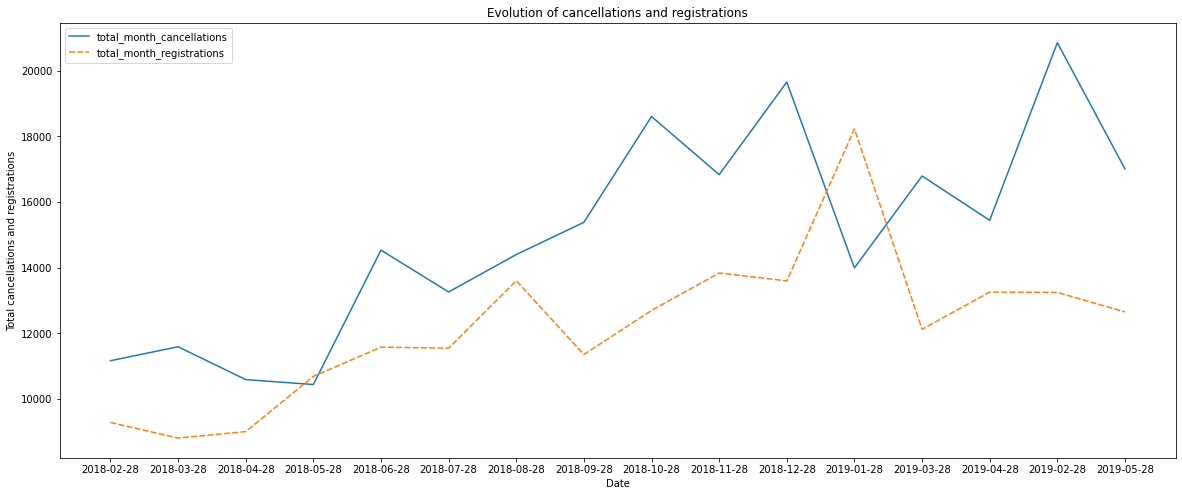

In [33]:
# Graphic

plt.figure(figsize=(20,8))
graph_var=sns.lineplot(data=total_var_month)
graph_var.set(xlabel='Date', ylabel='Total cancellations and registrations')
plt.title('Evolution of cancellations and registrations')
plt.show()

If we look at both the individual graphs and the total graph, we see a trend at the end of the year and at the beginning of the new year. The number of cancellations tends to increase and the number of hires decreases considerably. In fact, we can see the month with the most cancellations and the month with the most registrations:

--> Month with most cancellations

In [34]:
total_var_month['total_month_cancellations'].sort_values(ascending=False).head(3).reset_index()

,pk_partition,total_month_cancellations
0,2019-02-28,20855.00
1,2018-12-28,19655.00
2,2018-10-28,18606.00


--> Month with most registrations

In [35]:
total_var_month['total_month_registrations'].sort_values(ascending=False).head(3).reset_index()

,pk_partition,total_month_registrations
0,2019-01-28,18224.00
1,2018-11-28,13839.00
2,2018-08-28,13603.00


* **Average duration of contrat for each product:**

In [36]:
# first of all, we have to convert the products dataset variable to date format

df_products['pk_partition'] = pd.to_datetime(df_products['pk_partition'], format = '%Y-%m-%d')

In [37]:
# function to calculate the days of duration of each product per customer

def DurationContracts(df, column_name):
    # We calculate for a contracted product, the minimum and maximum contracting data
    suscription_date = df_products[df_products[column_name] ==1].groupby('pk_cid')['pk_partition'].min()
    unsuscription_date = df_products[df_products[column_name] ==1].groupby('pk_cid')['pk_partition'].max()
    
    dates = pd.merge(suscription_date, unsuscription_date, on='pk_cid')
    dates.columns=['suscription_date','unsuscription_date']
    
    # We add 30 more days as the cancellation and to prevent one-month contracts from having 0 days
    dates['unsuscription_date'] = dates['unsuscription_date'] + datetime.timedelta(days=30)
    
    # creation of contract duration
    dates['contract_duration'] = dates['unsuscription_date'] - dates['suscription_date']
    
    return dates
    
    

In [38]:
dates_short_term_deposit = DurationContracts(df_products,'short_term_deposit')
dates_loans = DurationContracts(df_products,"loans")
dates_mortgage = DurationContracts(df_products,"mortgage")
dates_funds = DurationContracts(df_products,"funds")
dates_securities = DurationContracts(df_products,"securities")
dates_long_term_deposit = DurationContracts(df_products,"long_term_deposit")
dates_credit_card = DurationContracts(df_products,"credit_card")
dates_payroll = DurationContracts(df_products,"payroll")
dates_pension_plan = DurationContracts(df_products,"pension_plan")
dates_payroll_account = DurationContracts(df_products,"payroll_account")
dates_emc_account = DurationContracts(df_products,"emc_account")
dates_debit_card = DurationContracts(df_products,"debit_card")
dates_em_acount = DurationContracts(df_products,"em_acount")

As we see in the example for "credit_card", we have for each client, the day they subscribed to the product, the day they unsubscribed and the days of duration of the contract.

In [39]:
dates_credit_card.head()

,suscription_date,unsuscription_date,contract_duration
pk_cid,,,
19021,2018-01-28,2019-06-27,515 days
20333,2018-04-28,2019-06-27,425 days
29008,2018-04-28,2019-05-28,395 days
29896,2018-10-28,2019-01-27,91 days
31825,2018-02-28,2019-06-27,484 days


We create a mean_duration dataframe where for each product we will store the average days of all customers for each product

In [40]:
df_mean_duration = pd.DataFrame(index=['MeanDuration'])

def MeanDuration(column_name, df):
    df_mean_duration[column_name] = df['contract_duration'].mean(axis=0).days
    
    return df_mean_duration

In [41]:
MeanDuration("short_term_deposit", dates_short_term_deposit)
MeanDuration("loans", dates_loans)
MeanDuration("mortgage", dates_mortgage)
MeanDuration("funds", dates_funds)
MeanDuration("securities", dates_securities)
MeanDuration("long_term_deposit", dates_long_term_deposit)
MeanDuration("credit_card", dates_credit_card)
MeanDuration("payroll", dates_payroll)
MeanDuration("pension_plan", dates_pension_plan)
MeanDuration("payroll_account", dates_payroll_account)
MeanDuration("emc_account", dates_emc_account)
MeanDuration("debit_card", dates_debit_card)
MeanDuration("em_acount", dates_em_acount)

,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_acount
MeanDuration,87,322,392,367,326,338,302,266,270,324,362,304,402


<Axes: title={'center': 'Average duration per product'}>

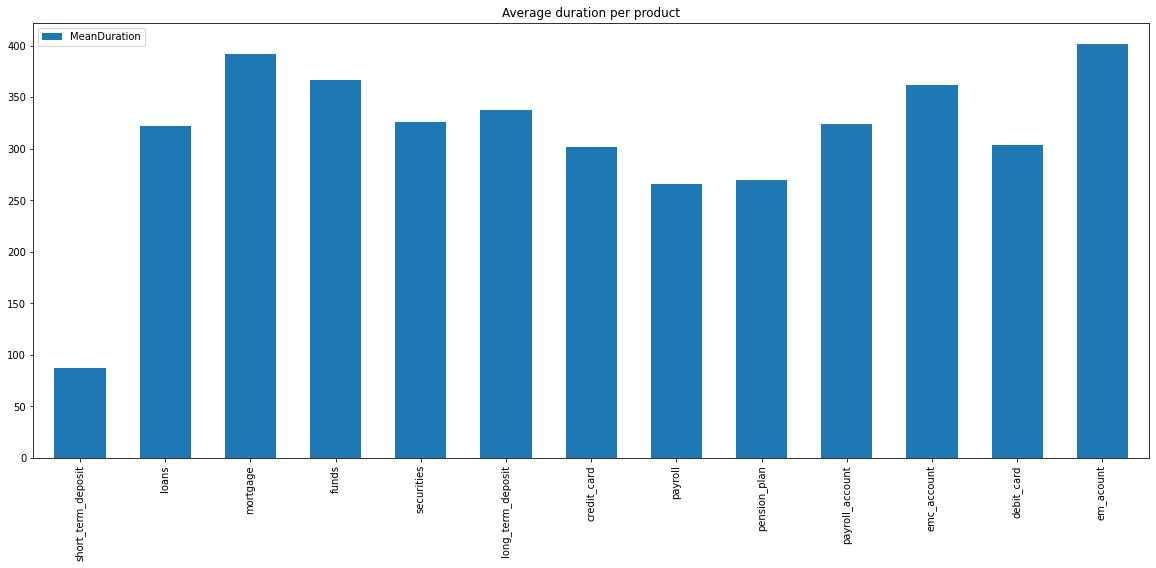

In [42]:
df_mean_duration_T = df_mean_duration.T
df_mean_duration_T.plot(kind = "bar", title = "Average duration per product", width=0.6, figsize=(20,8))

We can see the top 3 most durable products by our clients:

In [43]:
df_mean_duration_T.sort_values(by="MeanDuration", ascending=False, inplace = True)
df_mean_duration_T.head(3)

,MeanDuration
em_acount,402
mortgage,392
funds,367


* **Current products per customer:**

We restart the df_products as it was at the beginning (with the passage of cells we have been adding columns)

In [44]:
df_products = df_products.iloc[:, 0:17]

In [45]:
# We calculate for the current date (2019-05-28)

products_now = df_products[df_products["pk_partition"] == "2019-05-28"]
products_now.drop("pk_partition", axis= 1, inplace=True)
products_now.set_index("pk_cid", inplace=True)

# We add all the products to know how many total products each customer has
df_sales_now = pd.DataFrame(products_now.sum(axis=1), index=products_now.index, columns=["Sales"]).reset_index()
df_sales_now.head(10)

C:\Users\victo\AppData\Local\Temp/ipykernel_16096/623829327.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_now.drop("pk_partition", axis= 1, inplace=True)


,pk_cid,Sales
0,657826,1.00
1,657817,0.00
2,657986,6.00
3,657905,2.00
4,657336,1.00
5,657147,0.00
6,658184,6.00
7,658576,1.00
8,655774,1.00
9,655419,0.00


We can count the number of customers who have a certain number of specific products.

In [46]:
number_products = df_sales_now.groupby('Sales')['pk_cid'].count().reset_index()
number_products.columns = ['number_of_products','pk_cid']
number_products

,number_of_products,pk_cid
0,0.00,111407
1,1.00,268286
2,2.00,38714
3,3.00,11502
4,4.00,8479
5,5.00,3342
6,6.00,1038
7,7.00,194
8,8.00,31
9,9.00,2


In [47]:
((111407 + 268286 + 38714)/442995)*100

94.44959875393627

<Axes: title={'center': 'Clientes per number of products'}>

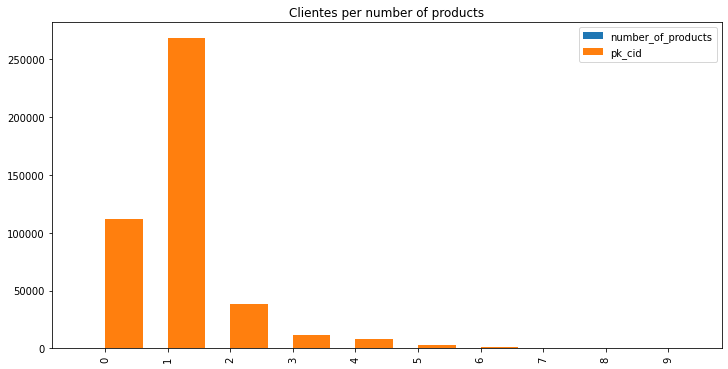

In [48]:
number_products.plot(kind = "bar", title = "Clientes per number of products", width=1.2, figsize=(12,6))

Between the clients who have a product and those who do not have any product, they are 85% of the total clients ((111407 + 268286)/total_product). \
And if we add those who have 2 products, we get to 94%

In [49]:
total_products = number_products['pk_cid'].sum()

**II) Customers analysis** 
* **Customer entry date:** We study the evolution of customer acquisition according to the entry_date 

First of all we correct the values that are prone to errors, such as February 29. Then we transform the entire column to datetime type


In [50]:
df.loc[df['entry_date'] == '2019-02-29', 'entry_date'] = '2019-02-28'
df.loc[df['entry_date'] == '2015-02-29', 'entry_date'] = '2015-02-28'

df['entry_date'] = pd.to_datetime(df['entry_date'], format='%Y-%m-%d')

In [51]:
clients_by_entry_date = pd.DataFrame(df.groupby(['entry_date','pk_cid']).size(), columns=['Duration']).reset_index()
clients_by_entry_date['YEAR'] = clients_by_entry_date["entry_date"].dt.year
clients_by_entry_date['MONTH'] = clients_by_entry_date["entry_date"].dt.month
clients_by_entry_date['year_month'] = pd.to_datetime(clients_by_entry_date['entry_date']).dt.to_period('M')
clients_by_entry_date

,entry_date,pk_cid,Duration,YEAR,MONTH,year_month
0,2015-01-01,622277,17,2015,1,2015-01
1,2015-01-02,177266,17,2015,1,2015-01
2,2015-01-02,388445,17,2015,1,2015-01
3,2015-01-02,427613,17,2015,1,2015-01
4,2015-01-02,892984,13,2015,1,2015-01
...,...,...,...,...,...,...
456375,2019-05-31,1553685,1,2019,5,2019-05
456376,2019-05-31,1553686,1,2019,5,2019-05
456377,2019-05-31,1553687,1,2019,5,2019-05
456378,2019-05-31,1553688,1,2019,5,2019-05


<Axes: xlabel='YEAR,MONTH'>

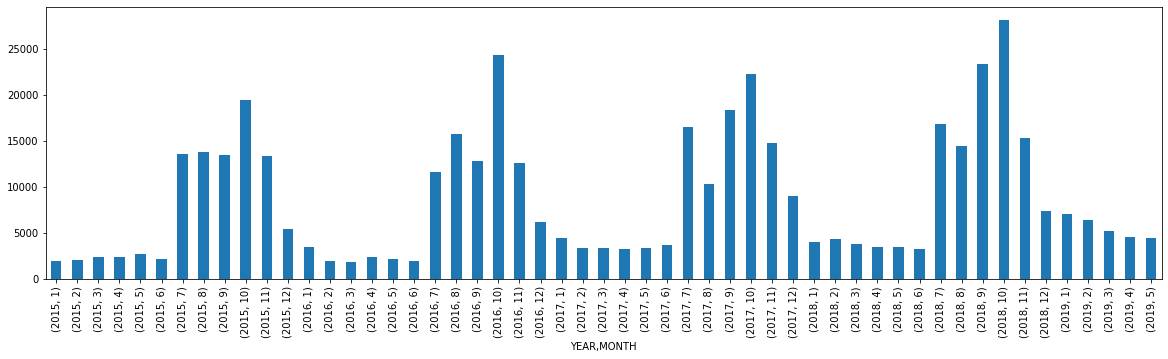

In [52]:
client_by_entry_month = clients_by_entry_date.groupby(['YEAR','MONTH'])['pk_cid'].count()
client_by_entry_month.plot(kind='bar', figsize=(20,5), legend=None)

We can observe that the incoming flow of clients is cyclical. During the months  July, August, September, October and November is when more clients enter the platform for the first time.

* **Entry_channel:**

Text(0, 0.5, '')

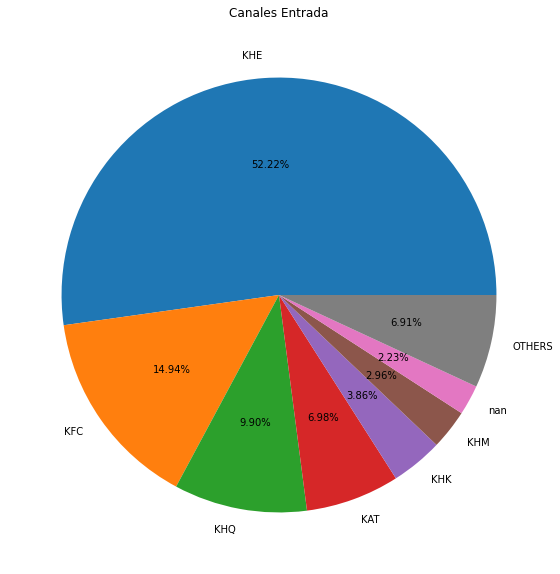

In [53]:
# distribution of values
value_counts = df['entry_channel'].value_counts(dropna=False, normalize = True)

# values less than 2%
threshold = 0.02
mask = value_counts < threshold

# create a series that combines values less than 2%
others = value_counts[mask].sum()
others_series = pd.Series([others], index=['OTHERS'])

# replace values less than 2% with "OTHER"
value_counts = value_counts[~mask]
value_counts = pd.concat([value_counts, others_series])

plt.figure(figsize=(30,10))
value_counts.plot.pie(autopct='%1.2f%%',shadow=False)
plt.title('Canales Entrada')
plt.ylabel('')

